# Baynes Sound
# May 30, 2017

In [51]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [52]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [53]:
Bathy, lon, lats = tidetools.get_bathy_data(grid)

In [38]:
geo_tools.find_closest_model_point( -124.74465,49.4616, lon, lats, land_mask = Bathy.mask)

(599, 125)

In [54]:
geo_tools.find_closest_model_point( -124.4440,49.2739, lon, lats, land_mask = Bathy.mask) #Deep Bay

(558, 155)

# Hindcast

# June

In [39]:
Jun_data = glob.glob('/results/SalishSea/hindcast/3*jun15/SalishSea_1h*grid_T.nc')
Jun_data

['/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

In [40]:
ordered = ['/results/SalishSea/hindcast/01jun15/SalishSea_1h_20150601_20150601_grid_T.nc',
          '/results/SalishSea/hindcast/02jun15/SalishSea_1h_20150602_20150602_grid_T.nc',
          '/results/SalishSea/hindcast/03jun15/SalishSea_1h_20150603_20150603_grid_T.nc',
          '/results/SalishSea/hindcast/04jun15/SalishSea_1h_20150604_20150604_grid_T.nc',
          '/results/SalishSea/hindcast/05jun15/SalishSea_1h_20150605_20150605_grid_T.nc',
          '/results/SalishSea/hindcast/06jun15/SalishSea_1h_20150606_20150606_grid_T.nc',
          '/results/SalishSea/hindcast/07jun15/SalishSea_1h_20150607_20150607_grid_T.nc',
          '/results/SalishSea/hindcast/08jun15/SalishSea_1h_20150608_20150608_grid_T.nc',
          '/results/SalishSea/hindcast/09jun15/SalishSea_1h_20150609_20150609_grid_T.nc',
          '/results/SalishSea/hindcast/10jun15/SalishSea_1h_20150610_20150610_grid_T.nc',
          '/results/SalishSea/hindcast/11jun15/SalishSea_1h_20150611_20150611_grid_T.nc',
          '/results/SalishSea/hindcast/12jun15/SalishSea_1h_20150612_20150612_grid_T.nc',
          '/results/SalishSea/hindcast/13jun15/SalishSea_1h_20150613_20150613_grid_T.nc',
          '/results/SalishSea/hindcast/14jun15/SalishSea_1h_20150614_20150614_grid_T.nc',
          '/results/SalishSea/hindcast/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc',
          '/results/SalishSea/hindcast/16jun15/SalishSea_1h_20150616_20150616_grid_T.nc',
          '/results/SalishSea/hindcast/17jun15/SalishSea_1h_20150617_20150617_grid_T.nc',
          '/results/SalishSea/hindcast/18jun15/SalishSea_1h_20150618_20150618_grid_T.nc',
          '/results/SalishSea/hindcast/19jun15/SalishSea_1h_20150619_20150619_grid_T.nc',
          '/results/SalishSea/hindcast/20jun15/SalishSea_1h_20150620_20150620_grid_T.nc',
          '/results/SalishSea/hindcast/21jun15/SalishSea_1h_20150621_20150621_grid_T.nc',
          '/results/SalishSea/hindcast/22jun15/SalishSea_1h_20150622_20150622_grid_T.nc',
          '/results/SalishSea/hindcast/23jun15/SalishSea_1h_20150623_20150623_grid_T.nc',
          '/results/SalishSea/hindcast/24jun15/SalishSea_1h_20150624_20150624_grid_T.nc',
          '/results/SalishSea/hindcast/25jun15/SalishSea_1h_20150625_20150625_grid_T.nc',
          '/results/SalishSea/hindcast/26jun15/SalishSea_1h_20150626_20150626_grid_T.nc',
          '/results/SalishSea/hindcast/27jun15/SalishSea_1h_20150627_20150627_grid_T.nc',
          '/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered) as f:
    t = f.variables['votemper'][:,:,599,125]
    print(t.shape)

(720, 40)


In [41]:
with nc_tools.scDataset(ordered) as f:
    s = f.variables['vosaline'][:,:,599,125]
    print(s.shape)

(720, 40)


In [45]:
ordered2 = ['/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered2) as f:
    t2 = f.variables['votemper'][:,:,599,125]
    print(t2.shape)
    
with nc_tools.scDataset(ordered2) as f:
    s2 = f.variables['vosaline'][:,:,599,125]
    print(s2.shape)

(72, 40)
(72, 40)


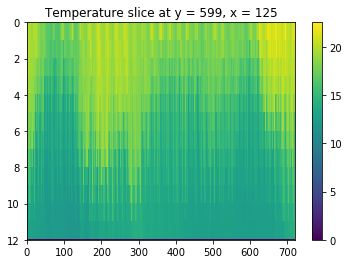

In [32]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125')

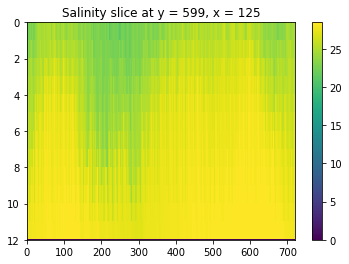

In [33]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125')

# Three day T-S plots

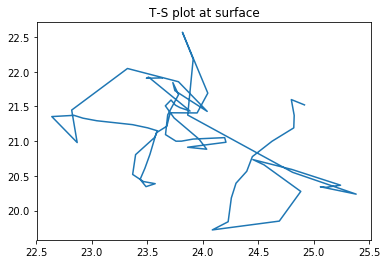

In [46]:
plt.plot(s2[:,0],t2[:,0]);
plt.title('T-S plot at surface')

# T-S plots over June

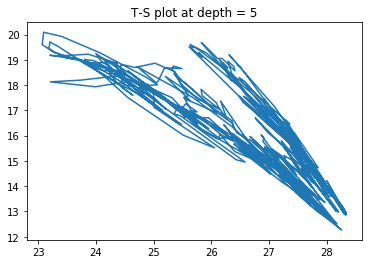

In [34]:
plt.plot(s[:,5],t[:,5]);
plt.title('T-S plot at depth = 5')

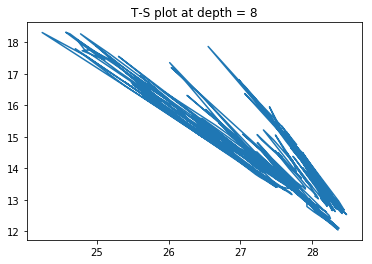

In [42]:
plt.plot(s[:,8],t[:,8]);
plt.title('T-S plot at depth = 8')

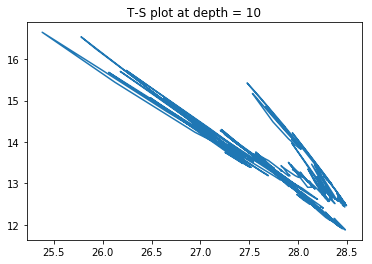

In [35]:
plt.plot(s[:,10],t[:,10]);
plt.title('T-S plot at depth = 10')

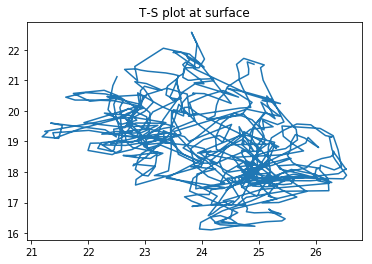

In [36]:
plt.plot(s[:,0],t[:,0]);
plt.title('T-S plot at surface')

# July

In [83]:
ordered3 = ['/results/SalishSea/hindcast/26jul15/SalishSea_1h_20150726_20150726_grid_T.nc',
          '/results/SalishSea/hindcast/27jul15/SalishSea_1h_20150727_20150727_grid_T.nc']

with nc_tools.scDataset(ordered3) as f:
    t3 = f.variables['votemper'][:,:,599,125]
    print(t3.shape)
    
with nc_tools.scDataset(ordered3) as f:
    s3 = f.variables['vosaline'][:,:,599,125]
    print(s3.shape)

(48, 40)
(48, 40)


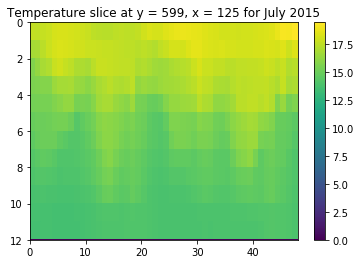

In [84]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t3.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125 for July 2015')

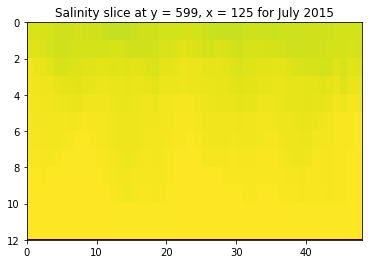

In [125]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s3.T)
#fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125 for July 2015')

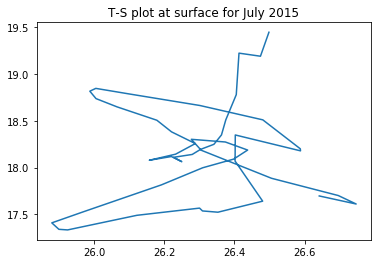

In [86]:
plt.plot(s3[:,0],t3[:,0]);
plt.title('T-S plot at surface for July 2015')

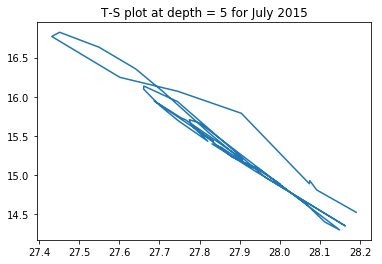

In [124]:
plt.plot(s3[:,5],t3[:,5]);
plt.title('T-S plot at depth = 5 for July 2015')

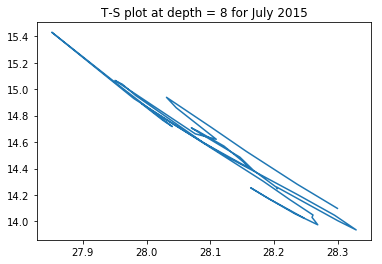

In [88]:
plt.plot(s3[:,8],t3[:,8]);
plt.title('T-S plot at depth = 8 for July 2015')

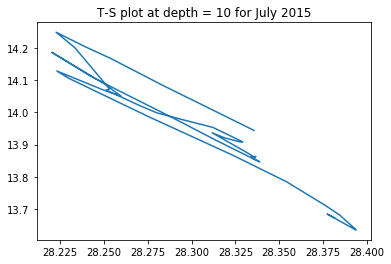

In [89]:
plt.plot(s3[:,10],t3[:,10]);
plt.title('T-S plot at depth = 10 for July 2015')

# B03

In [73]:
B03_big = nc.Dataset('/data/vdo/MEOPAR/completed-runs/B03/1_SalishSea_1h_20150626_20150706_grid_T.nc')

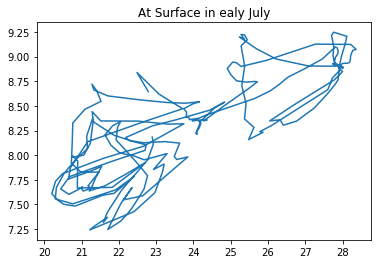

In [94]:
plt.plot(B02_big.variables['vosaline'][:,0,599,125],B02_big.variables['votemper'][:,0,599,125])
plt.title('At Surface in ealy July')

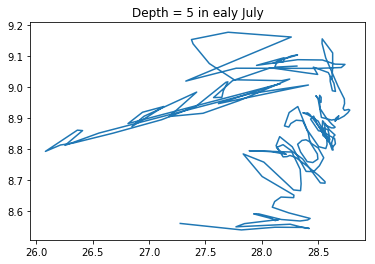

In [95]:
plt.plot(B02_big.variables['vosaline'][:,5,599,125],B02_big.variables['votemper'][:,5,599,125])
plt.title('Depth = 5 in ealy July')

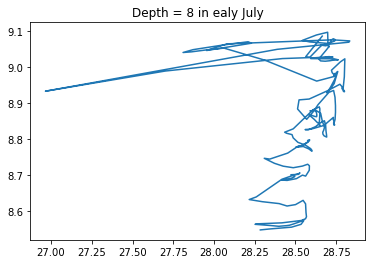

In [96]:
plt.plot(B02_big.variables['vosaline'][:,8,599,125], B02_big.variables['votemper'][:,8,599,125])
plt.title('Depth = 8 in ealy July')

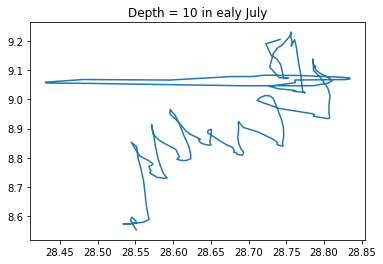

In [97]:
plt.plot(B02_big.variables['vosaline'][:,10,599,125],B02_big.variables['votemper'][:,10,599,125])
plt.title('Depth = 10 in ealy July')

# Attempting to reproduce Salinity-Depth Plot

In [9]:
B02_bigx = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/B02/SalishSea_1h_20150308_20150318_grid_T.nc')

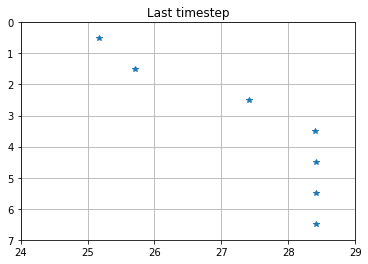

In [118]:
plt.plot(B02_big.variables['vosaline'][239,:,558,155], B02_bigx.deptht.values,'*')
plt.xlim(24,29)
plt.ylim(7,0)
plt.title('Last timestep')
plt.grid('on')

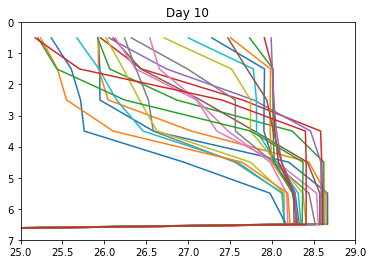

In [122]:
for n in range(216,240):
    plt.plot(B02_big.variables['vosaline'][n,:,558,155], B02_bigx.deptht.values)
plt.xlim(25,29)
plt.ylim(7,0)
plt.title('Day 10')
#plt.grid('on')

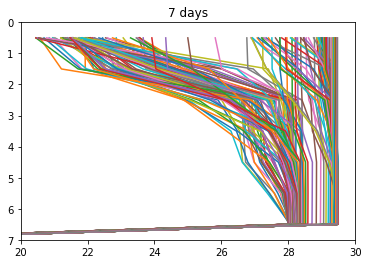

In [121]:
for n in range(168):
    plt.plot(B02_big.variables['vosaline'][n,:,558,155], B02_bigx.deptht.values)
plt.xlim(20,30)
plt.ylim(7,0)
plt.title('7 days')